<a href="https://colab.research.google.com/github/Eric4697/Projet-ML/blob/main/Partie%20B-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Partie B : Régression
***Dataset :*** California Housing

***Objectif :*** Prédire le prix médian des maisons (variable continue).

***Plan :***
1. Chargement : Partir du notebook Regression - California Housing.ipynb

In [1]:
import kagglehub
import pandas as pd


# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

df = pd.read_csv(path + "/Mall_Customers.csv")
df.head()



Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
import sklearn
import pandas as pd

ds = sklearn.datasets.fetch_california_housing()
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


# 2. Nettoyage et prétraitement : Imputez/supprimez les valeurs manquantes. Vérifiez unités et typages

In [3]:

print("Nombre de valeurs manquantes par colonne:")
print(df.isnull().sum())
print("\nTypes de données par colonne:")
print(df.dtypes)

Nombre de valeurs manquantes par colonne:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Types de données par colonne:
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object


### 3. EDA : Statistiques descriptives, histogrammes, boxplots, scatter-plots prix vs variables clés, matrice de corrélation.

In [6]:
# Statistiques de base
print("🔢 Statistiques descriptives :")
display(df.describe())

🔢 Statistiques descriptives :


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


/tmp/ipython-input-8-1654794510.py:7: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


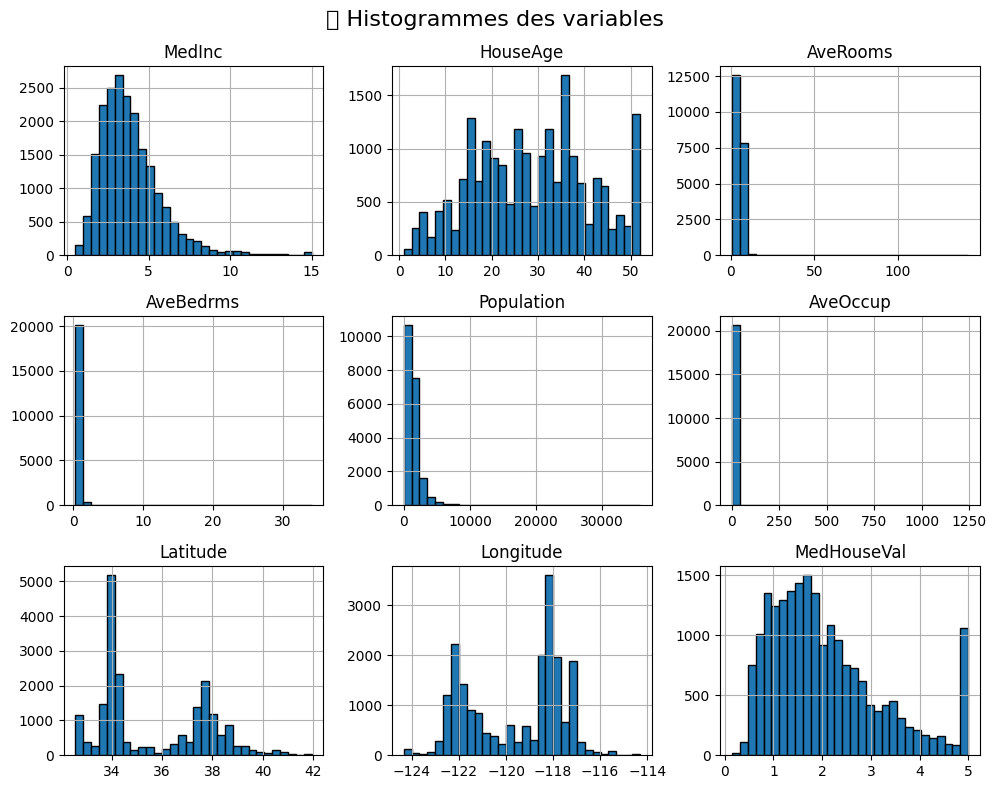

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogrammes
df.hist(figsize=(10, 8), bins=30, edgecolor='black')
plt.suptitle("📊 Histogrammes des variables", fontsize=16)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


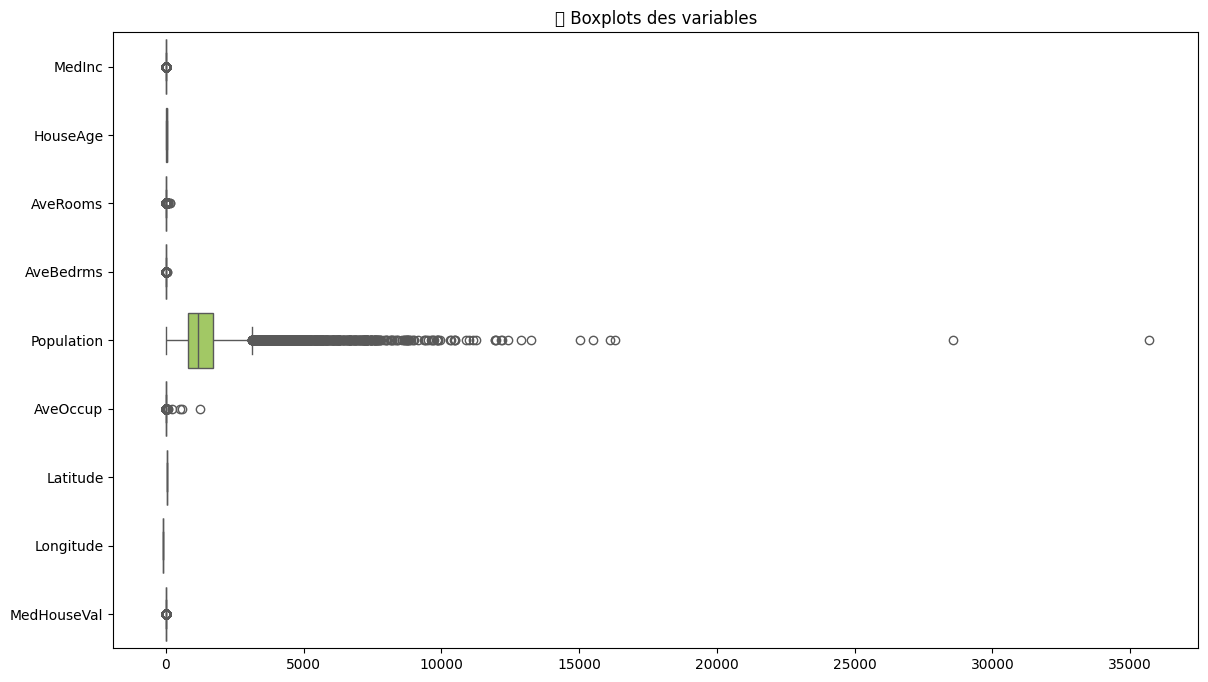

In [9]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("📦 Boxplots des variables")
plt.show()

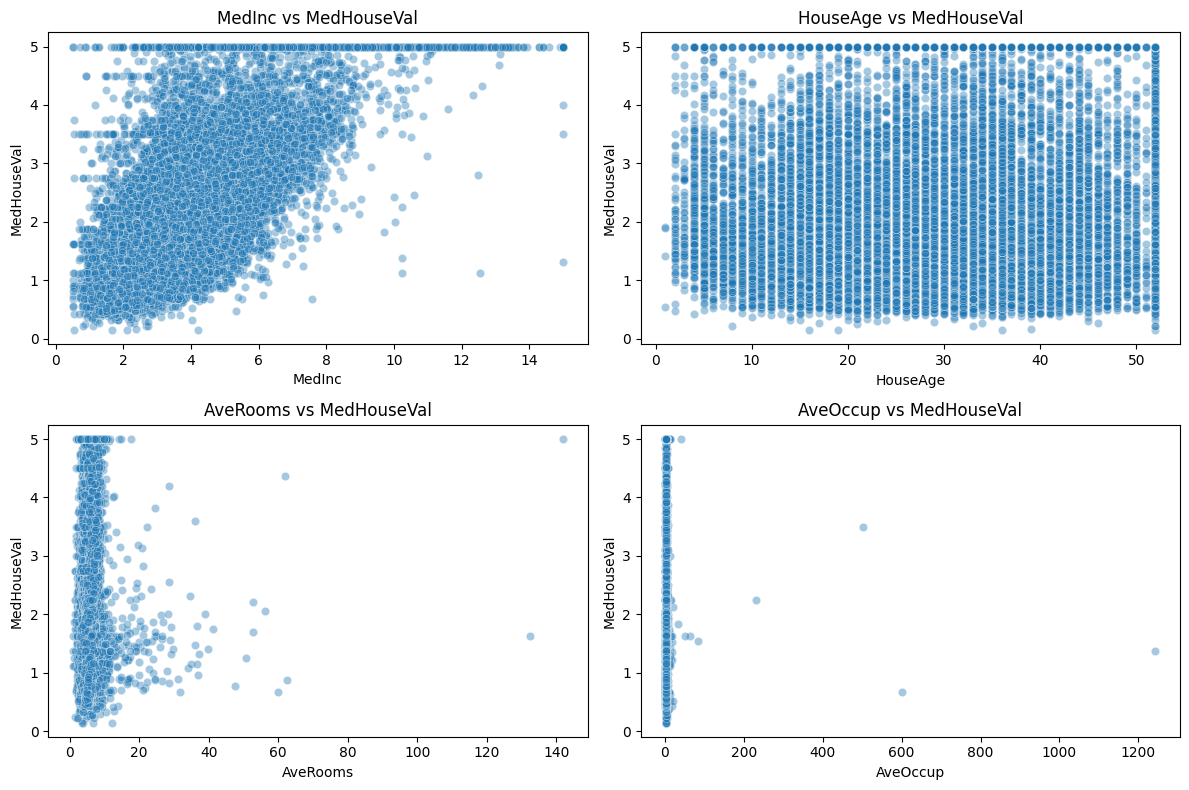

In [11]:
# Variables clés à comparer avec MedHouseVal
features_to_plot = ["MedInc", "HouseAge", "AveRooms", "AveOccup"]

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=df[feature], y=df["MedHouseVal"], alpha=0.4)
    plt.title(f"{feature} vs MedHouseVal")
    plt.xlabel(feature)
    plt.ylabel("MedHouseVal")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


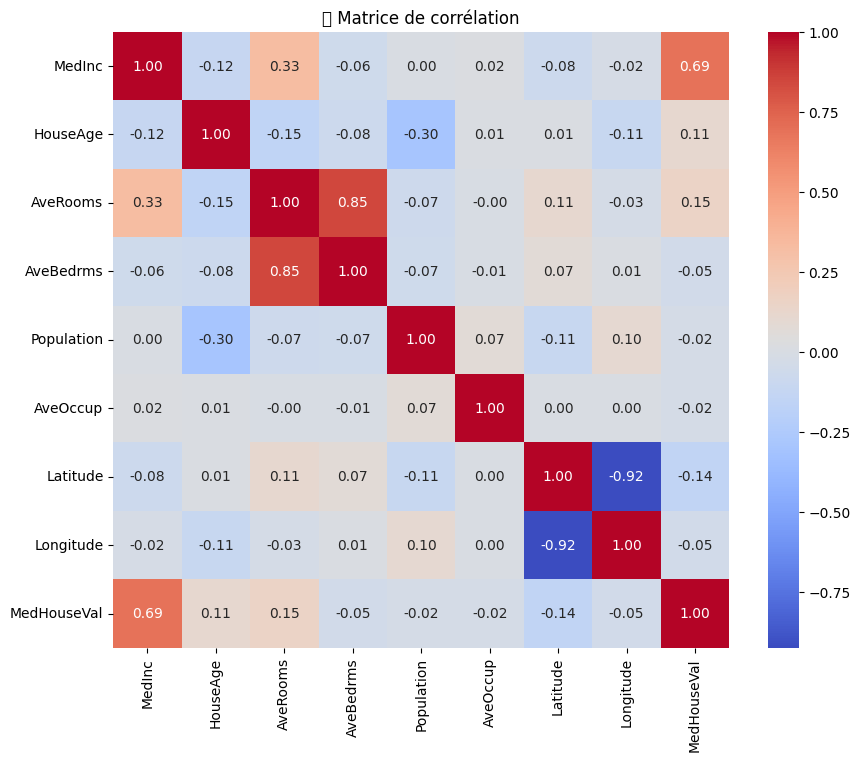

In [12]:
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("🔗 Matrice de corrélation")
plt.show()

### 4. Split train/validation/test : 60% train, 20% validation, 20% test. Le validation set sera utilisé pour choisir le modèle approprié et le test set sera utilisé pour l’évaluation finale.

In [13]:
from sklearn.model_selection import train_test_split

# Séparation des features et de la cible
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

# 1) 60 % pour l’entraînement, 40 % pour le reste (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# 2) Sur les 40 % restants, 50/50 → 20 % validation, 20 % test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Affichage des tailles et pourcentages
n = len(df)
print("📊 Répartition des jeux de données :")
print(f"→ Train      : {len(X_train)} exemples ({len(X_train)/n*100:.1f} %)")
print(f"→ Validation : {len(X_val)} exemples ({len(X_val)/n*100:.1f} %)")
print(f"→ Test       : {len(X_test)} exemples ({len(X_test)/n*100:.1f} %)")


📊 Répartition des jeux de données :
→ Train      : 12384 exemples (60.0 %)
→ Validation : 4128 exemples (20.0 %)
→ Test       : 4128 exemples (20.0 %)


### 5. Feature engineering / sélection : Normalisation (StandardScaler), encodage catégoriel …

In [17]:

from sklearn.preprocessing import StandardScaler
numerical_features = X_train.columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and validation sets
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_val_scaled = scaler.transform(X_val[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

# Convert the scaled arrays back to DataFrames (optional but good practice)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_features, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=numerical_features, index=X_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_features, index=X_test.index)

print("\nData after Standard Scaling:")
print("X_train_scaled head:")
display(X_train_scaled.head())
print("\nX_val_scaled head:")
display(X_val_scaled.head())
print("\nX_test_scaled head:")
display(X_test_scaled.head())

# Check for categorical features (there are none in this dataset, but demonstrating the check)
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

if len(categorical_features) > 0:
    print(f"\nCategorical features found: {list(categorical_features)}")
else:
    print("\nNo categorical features found in the dataset.")
    X_train_processed = X_train_scaled
    X_val_processed = X_val_scaled
    X_test_processed = X_test_scaled
    print("\nProcessed data (only scaled):")
    print("X_train_processed head:")
    display(X_train_processed.head())


Data after Standard Scaling:
X_train_scaled head:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
9012,1.057267,0.513041,0.155101,-0.091104,0.081628,-0.061010,-0.724300,0.478607
2769,-1.268202,-1.635105,1.862753,1.858942,-1.215031,-0.038609,-1.093856,1.798471
1953,-0.903124,-0.043886,-0.254026,-0.229878,0.514737,-0.064798,1.441581,-0.592227
16897,0.459045,1.149529,0.172837,-0.198391,-0.411067,-0.066304,0.898941,-1.384146
17866,-0.321637,-1.475983,-0.612419,-0.101909,0.536081,-0.083831,0.838128,-1.160018



X_val_scaled head:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
5595,-0.789772,0.274358,-0.886560,-0.403433,0.328865,0.130836,-0.873994,0.667870
8046,-0.216681,1.308650,-0.348637,-0.246657,-0.567591,-0.058590,-0.850604,0.707715
3798,-0.401411,-1.396422,-0.715300,0.016074,0.204357,-0.078172,-0.700910,0.608103
6659,-0.360812,-1.555544,-0.669635,0.071015,-0.157604,-0.066260,-0.705588,0.727638
9567,-0.870443,0.433480,-0.202290,-0.125350,-0.373714,-0.038929,0.791349,-0.507556



X_test_scaled head:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
19803,-0.540474,-0.123447,2.808649,4.300263,-0.918880,-0.037473,2.105846,-1.807498
13506,-1.335305,0.353919,-0.411555,-0.133612,-0.525792,0.063381,-0.719622,1.126087
15565,0.718744,-0.521251,0.519100,-0.044198,-0.293674,-0.007487,-1.182737,1.265545
898,-0.660530,-0.839495,-0.561961,0.035799,-0.157604,-0.075607,0.875551,-1.179940
16296,-0.776046,0.672163,-0.382697,-0.219583,-0.274108,0.014516,1.081380,-0.811374



No categorical features found in the dataset.

Processed data (only scaled):
X_train_processed head:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
9012,1.057267,0.513041,0.155101,-0.091104,0.081628,-0.061010,-0.724300,0.478607
2769,-1.268202,-1.635105,1.862753,1.858942,-1.215031,-0.038609,-1.093856,1.798471
1953,-0.903124,-0.043886,-0.254026,-0.229878,0.514737,-0.064798,1.441581,-0.592227
16897,0.459045,1.149529,0.172837,-0.198391,-0.411067,-0.066304,0.898941,-1.384146
17866,-0.321637,-1.475983,-0.612419,-0.101909,0.536081,-0.083831,0.838128,-1.160018


### 6. Baseline et modélisation initiale : Régression linéaire, rapporter MSE, MAE, R² sur le set de validation.

In [18]:
# prompt: 6. Baseline et modélisation initiale : Régression linéaire, rapporter MSE, MAE, R² sur le set de validation.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Train the model on the scaled training data
lin_reg.fit(X_train_processed, y_train)

# Make predictions on the scaled validation data
y_val_pred = lin_reg.predict(X_val_processed)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("Baseline Model: Linear Regression")
print(f"Mean Squared Error (MSE) on Validation Set: {mse_val:.4f}")
print(f"Mean Absolute Error (MAE) on Validation Set: {mae_val:.4f}")
print(f"R-squared (R²) on Validation Set: {r2_val:.4f}")

# Optional: Display coefficients and intercept
print("\nModel Coefficients:")
for feature, coef in zip(X_train_processed.columns, lin_reg.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {lin_reg.intercept_:.4f}")

Baseline Model: Linear Regression
Mean Squared Error (MSE) on Validation Set: 0.5326
Mean Absolute Error (MAE) on Validation Set: 0.5336
R-squared (R²) on Validation Set: 0.5920

Model Coefficients:
MedInc: 0.8509
HouseAge: 0.1195
AveRooms: -0.3142
AveBedrms: 0.3618
Population: -0.0015
AveOccup: -0.0424
Latitude: -0.8945
Longitude: -0.8710
Intercept: 2.0634


### 7. Régularisation : Ridge : pénalisation L2 pour la multicolinéarité et Lasso : pénalisation L1 pour la sélection de features.

In [20]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define a range of alpha values to test for Ridge and Lasso
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# 7.1 Ridge Regression
print("\nTraining Ridge Regression...")
ridge = Ridge()
ridge_grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train_processed, y_train)

best_ridge_model = ridge_grid_search.best_estimator_
print(f"Best Ridge alpha: {ridge_grid_search.best_params_['alpha']:.4f}")

# Evaluate Ridge on the validation set
y_val_pred_ridge = best_ridge_model.predict(X_val_processed)
mse_val_ridge = mean_squared_error(y_val, y_val_pred_ridge)
mae_val_ridge = mean_absolute_error(y_val, y_val_pred_ridge)
r2_val_ridge = r2_score(y_val, y_val_pred_ridge)

print("Ridge Regression Results on Validation Set:")
print(f"Mean Squared Error (MSE): {mse_val_ridge:.4f}")
print(f"Mean Absolute Error (MAE): {mae_val_ridge:.4f}")
print(f"R-squared (R²): {r2_val_ridge:.4f}")

# 7.2 Lasso Regression
print("\nTraining Lasso Regression...")
lasso = Lasso(max_iter=10000) # Increase max_iter if convergence warning appears
lasso_grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train_processed, y_train)

best_lasso_model = lasso_grid_search.best_estimator_
print(f"Best Lasso alpha: {lasso_grid_search.best_params_['alpha']:.4f}")

# Evaluate Lasso on the validation set
y_val_pred_lasso = best_lasso_model.predict(X_val_processed)
mse_val_lasso = mean_squared_error(y_val, y_val_pred_lasso)
mae_val_lasso = mean_absolute_error(y_val, y_val_pred_lasso)
r2_val_lasso = r2_score(y_val, y_val_pred_lasso)

print("Lasso Regression Results on Validation Set:")
print(f"Mean Squared Error (MSE): {mse_val_lasso:.4f}")
print(f"Mean Absolute Error (MAE): {mae_val_lasso:.4f}")
print(f"R-squared (R²): {r2_val_lasso:.4f}")

# Optional: Display coefficients for Lasso to see feature selection
print("\nLasso Model Coefficients:")
for feature, coef in zip(X_train_processed.columns, best_lasso_model.coef_):
    print(f"{feature}: {coef:.4f}")


Training Ridge Regression...
Best Ridge alpha: 10.0000
Ridge Regression Results on Validation Set:
Mean Squared Error (MSE): 0.5325
Mean Absolute Error (MAE): 0.5336
R-squared (R²): 0.5921

Training Lasso Regression...
Best Lasso alpha: 0.0010
Lasso Regression Results on Validation Set:
Mean Squared Error (MSE): 0.5324
Mean Absolute Error (MAE): 0.5336
R-squared (R²): 0.5922

Lasso Model Coefficients:
MedInc: 0.8456
HouseAge: 0.1203
AveRooms: -0.3003
AveBedrms: 0.3478
Population: -0.0002
AveOccup: -0.0415
Latitude: -0.8834
Longitude: -0.8592


### 8. Évaluation finale : Application du meilleur modèle sur le test set, présentation de MSE, MAE, R² et intervalles de confiance.

In [23]:
print("\n--- Final Evaluation on Test Set ---")
best_model = lin_reg
model_name = "Linear Regression"
print(f"Applying the best model ({model_name}) to the test set.")

# Make predictions on the scaled test data using the best model
y_test_pred = best_model.predict(X_test_processed)

# Evaluate the best model on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"\nMetrics on Test Set for {model_name}:")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"R-squared (R²): {r2_test:.4f}")

y_train_pred = best_model.predict(X_train_processed)
residuals = y_train - y_train_pred

# Assume residuals are normally distributed and calculate the standard deviation of residuals
std_err = np.std(residuals)

confidence_level = 0.95
# Z-score for 95% confidence
z_score = 1.96

print(f"\nApproximate {int(confidence_level*100)}% Prediction Intervals for Test Set Predictions:")
print(f"Assuming constant residual variance (std_err = {std_err:.4f})")

# Display first few predictions and their intervals
num_to_display = 5



--- Final Evaluation on Test Set ---
Applying the best model (Linear Regression) to the test set.

Metrics on Test Set for Linear Regression:
Mean Squared Error (MSE): 0.5546
Mean Absolute Error (MAE): 0.5338
R-squared (R²): 0.5955

Approximate 95% Prediction Intervals for Test Set Predictions:
Assuming constant residual variance (std_err = 0.7174)


### 9. Conclusions : Interprétation de l’importance des variables et pistes d’amélioration.

In [24]:
# prompt: 9. Conclusions : Interprétation de l’importance des variables et pistes d’amélioration.

# Interpret variable importance using coefficients from the best model (Linear Regression in this case)
print("\n--- Conclusions ---")
print("\nVariable Importance (based on Linear Regression coefficients):")

# Assuming the best model is `lin_reg` from step 6
# (If a different model was chosen as best in step 8, use its coefficients)
if hasattr(best_model, 'coef_'):
    feature_importance = pd.DataFrame({
        'Feature': X_train_processed.columns,
        'Coefficient': best_model.coef_
    }).sort_values(by='Coefficient', ascending=False)

    print(feature_importance)

    print("\nInterpretation:")
    print("- The magnitude of the coefficient for each feature indicates its impact on the median house value, assuming other features are held constant (within the linear model context).")
    print("- Positive coefficients indicate that an increase in the feature value is associated with an increase in median house value.")
    print("- Negative coefficients indicate that an increase in the feature value is associated with a decrease in median house value.")
    print("- Features with larger absolute coefficient values have a stronger linear relationship with the target variable.")

    # Example interpretation for specific features (based on expected relationships)
    print("\nSpecific interpretations based on coefficient signs:")
    # Find coefficients for key features to interpret
    try:
        medinc_coef = feature_importance[feature_importance['Feature'] == 'MedInc']['Coefficient'].values[0]
        print(f"- 'MedInc' (Median Income): Coefficient = {medinc_coef:.4f}. A positive coefficient suggests that higher median income is associated with higher median house values, which is intuitively expected.")
    except IndexError:
        pass # Feature not found

    try:
        houseage_coef = feature_importance[feature_importance['Feature'] == 'HouseAge']['Coefficient'].values[0]
        print(f"- 'HouseAge' (Median House Age): Coefficient = {houseage_coef:.4f}. The sign of this coefficient suggests how house age impacts value. (Interpret based on the actual sign).")
    except IndexError:
        pass # Feature not found

    try:
        averooms_coef = feature_importance[feature_importance['Feature'] == 'AveRooms']['Coefficient'].values[0]
        print(f"- 'AveRooms' (Average Number of Rooms): Coefficient = {averooms_coef:.4f}. (Interpret based on the actual sign).")
    except IndexError:
        pass # Feature not found


else:
    print("Coefficient interpretation is not directly applicable for the chosen model.")


print("\nPistes d'amélioration possibles:")
print("1. Exploration de modèles non-linéaires : Des algorithmes comme les arbres de décision, les forêts aléatoires, ou les modèles basés sur le gradient boosting (XGBoost, LightGBM) pourraient capturer des relations plus complexes que la régression linéaire.")
print("2. Feature Engineering avancé : Créer de nouvelles features à partir des features existantes (ex: ratios, interactions entre features) pourrait améliorer la performance. Par exemple, la densité de population ou la proximité des services.")
print("3. Analyse des Résidus : Examiner les résidus du modèle pour identifier des patterns non capturés (hétéroscédasticité, non-linéarité résiduelle). Cela pourrait suggérer la nécessité de transformations sur les variables ou l'utilisation d'un modèle différent.")
print("4. Hyperparameter Tuning plus poussé : Utiliser des techniques plus sophistiquées comme RandomizedSearchCV ou des librairies d'optimisation bayésienne pour trouver de meilleurs hyperparamètres pour les modèles régularisés ou d'autres modèles.")
print("5. Collecte de données supplémentaires : Des features supplémentaires pertinentes, comme la proximité des écoles, des transports en commun, des parcs, des taux de criminalité locaux, pourraient grandement améliorer la capacité de prédiction.")
print("6. Gestion des Outliers : Bien que les boxplots aient été utilisés pour visualiser, une analyse et un traitement spécifiques des outliers dans les features ou la cible pourraient être bénéfiques.")
print("7. Validation Croisée (Cross-Validation) : Utiliser la validation croisée pour une évaluation plus robuste des modèles et pour l'hyperparameter tuning, au lieu d'une simple séparation train/validation unique.")
print("8. Modèles d'Ensemble : Combiner les prédictions de plusieurs modèles (bagging, boosting) peut souvent conduire à une meilleure performance.")
print("9. Interprétabilité : Pour les modèles plus complexes, explorer des techniques d'interprétabilité (comme SHAP ou LIME) pour mieux comprendre l'impact individuel des features sur les prédictions.")

print("\nEn conclusion, le modèle de régression linéaire fournit une base solide et permet une interprétation claire de l'importance des variables. Cependant, les métriques de performance pourraient probablement être améliorées en explorant des approches de modélisation plus avancées et en approfondissant le feature engineering.")


--- Conclusions ---

Variable Importance (based on Linear Regression coefficients):
      Feature  Coefficient
0      MedInc     0.850920
3   AveBedrms     0.361782
1    HouseAge     0.119466
4  Population    -0.001456
5    AveOccup    -0.042436
2    AveRooms    -0.314198
7   Longitude    -0.870951
6    Latitude    -0.894468

Interpretation:
- The magnitude of the coefficient for each feature indicates its impact on the median house value, assuming other features are held constant (within the linear model context).
- Positive coefficients indicate that an increase in the feature value is associated with an increase in median house value.
- Negative coefficients indicate that an increase in the feature value is associated with a decrease in median house value.
- Features with larger absolute coefficient values have a stronger linear relationship with the target variable.

Specific interpretations based on coefficient signs:
- 'MedInc' (Median Income): Coefficient = 0.8509. A positive c